 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

#%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [3]:
# Reading whale returns
df1 = pd.read_csv('/Users/tej/Documents/GitHub/Module_4_challenge/Resources/whale_returns1.csv')
df1['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%Y')

# Set the 'Date' column as the index
df1.set_index('Date', inplace=True)

In [4]:
# Count nulls
null_counts = df1.isnull().sum()

print("Columns with Null Values:")
print(null_counts)

Columns with Null Values:
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [5]:
# Drop nulls
df_cleaned = df1.dropna()
df1=df_cleaned
df1.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
df2 = pd.read_csv('/Users/tej/Documents/GitHub/Module_4_challenge/Resources/algo_returns.csv', parse_dates=['Date'], index_col='Date')

In [7]:
# Count nulls
null_counts = df2.isnull().sum()

print("Columns with Null Values:")
print(null_counts)

Columns with Null Values:
Algo 1    0
Algo 2    6
dtype: int64


In [8]:
# Drop nulls
df_cleaned = df2.dropna()
df2=df_cleaned
df2.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data.

In [9]:
# Reading S&P TSX 60 Closing Prices
df3 = pd.read_csv('/Users/tej/Documents/GitHub/Module_4_challenge/Resources/sp_tsx_history.csv', parse_dates=['Date'], index_col='Date')
df3.sort_index(inplace=True)
df3.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [10]:
# Check Data Types
print(df3.dtypes)

Close    object
dtype: object


In [11]:
# Fix Data Types
df3['Close'] = df3['Close'].str.replace('$', '').str.replace(',', '').astype(float)
print(df3.dtypes)

Close    float64
dtype: object


/var/folders/g4/9t8mhlws5mdfztt6df5l42jm0000gn/T/ipykernel_28116/1176045798.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df3['Close'] = df3['Close'].str.replace('$', '').str.replace(',', '').astype(float)


In [12]:
# Calculate Daily Returns
df4=df3.copy()
df4['Close'] = df4['Close'].pct_change()
df4.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [13]:
# Drop nulls
df4=df4.dropna()
df4.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [14]:
# Rename `Close` Column to be specific to this portfolio.
df4.columns=['TSX 60 Returns']
df4.head()

,TSX 60 Returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
merged_df = pd.concat([df1, df2, df4], axis='columns', join='inner')

---

In [16]:
portfolio_daily_returns = merged_df.drop(columns=['TSX 60 Returns'])

# Print the first few rows of the portfolio_daily_returns DataFrame
merged_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX 60 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

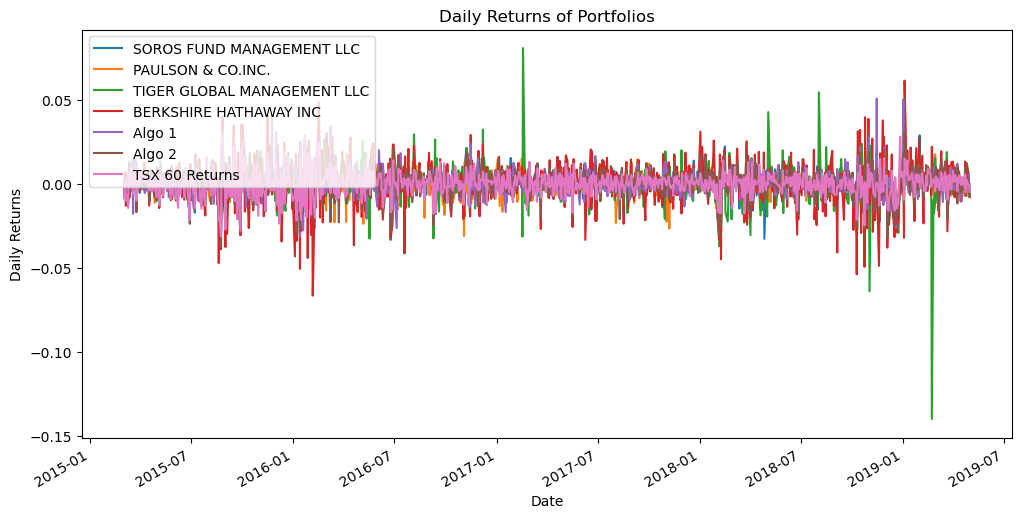

In [17]:
# Plot daily returns of all portfolios
merged_df.plot(figsize=(12, 6))
plt.title("Daily Returns of Portfolios")
plt.xlabel("Date")
plt.ylabel("Daily Returns")
plt.legend(loc="upper left")
plt.show()

#### Calculate and Plot cumulative returns.

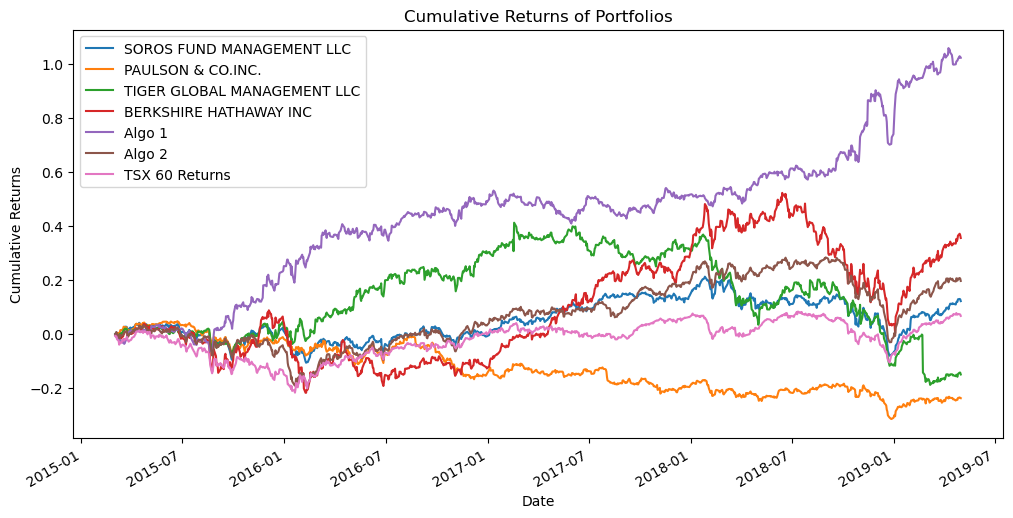

In [18]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + merged_df).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(12, 6))
plt.title("Cumulative Returns of Portfolios")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend(loc="upper left")
plt.show()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio.
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


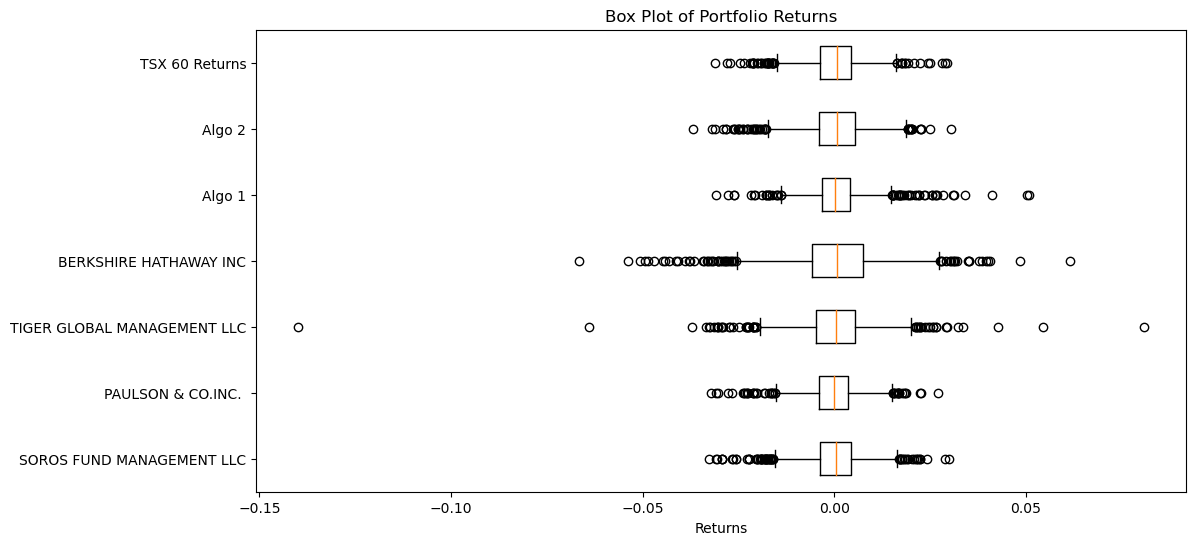

In [19]:
# Box plot to visually show risk

plt.figure(figsize=(12, 6))
plt.boxplot(merged_df.values, labels=merged_df.columns, vert=False)
plt.title("Box Plot of Portfolio Returns")
plt.xlabel("Returns")
plt.show()

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
all_portfolio_std = merged_df.std()
all_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
TSX 60 Returns                 0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [21]:
# Calculate  the daily standard deviation of S&P TSX 60
tsx60_std = merged_df['TSX 60 Returns'].std()
print(tsx60_std)
# Determine which portfolios are riskier than the S&P TSX 60
riskier_portfolios = all_portfolio_std[(all_portfolio_std['TSX 60 Returns'] < all_portfolio_std)]
riskier_portfolios

0.007034167748577725


SOROS FUND MANAGEMENT LLC      0.007828
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
dtype: float64

### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = all_portfolio_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
TSX 60 Returns                 0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta.

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

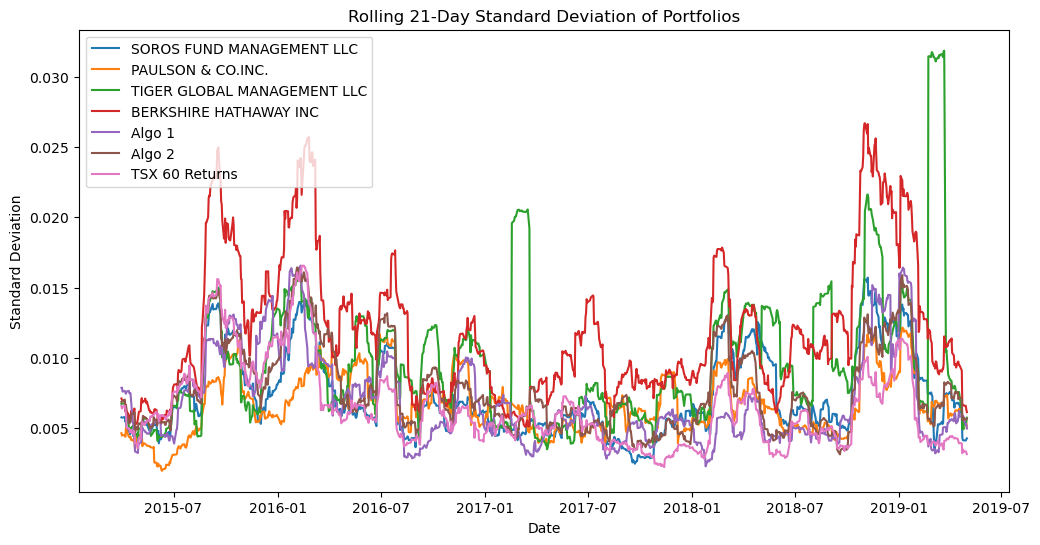

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = merged_df.rolling(window=21).std()
rolling_std
# Plot the rolling standard deviation
plt.figure(figsize=(12, 6))
for column in rolling_std.columns:
    plt.plot(rolling_std.index, rolling_std[column], label=column)

plt.title("Rolling 21-Day Standard Deviation of Portfolios")
plt.xlabel("Date")
plt.ylabel("Standard Deviation")
plt.legend(loc="upper left")
plt.show()

### Calculate and plot the correlation

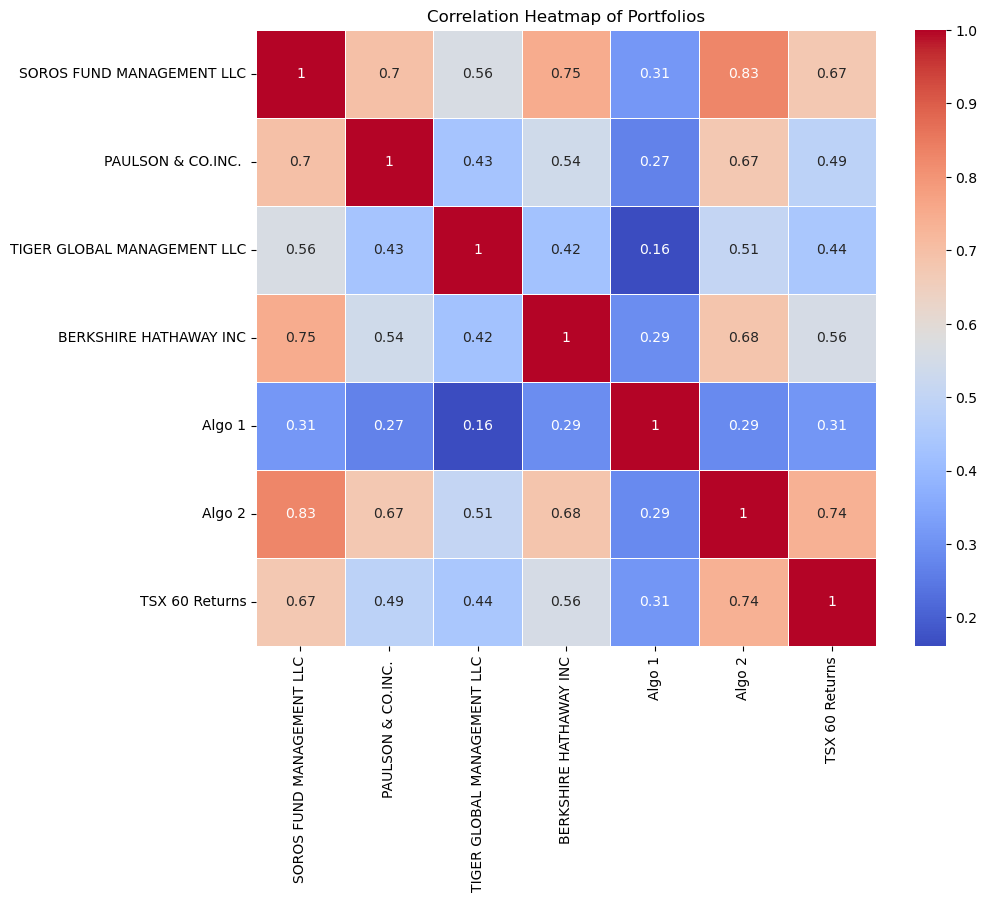

In [24]:
# Calculate the correlation
correlation_matrix = merged_df.corr()

# Display de correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Portfolios")
plt.show()

The low correlation between Algo1 and TSX 60 makes it fit for use .

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

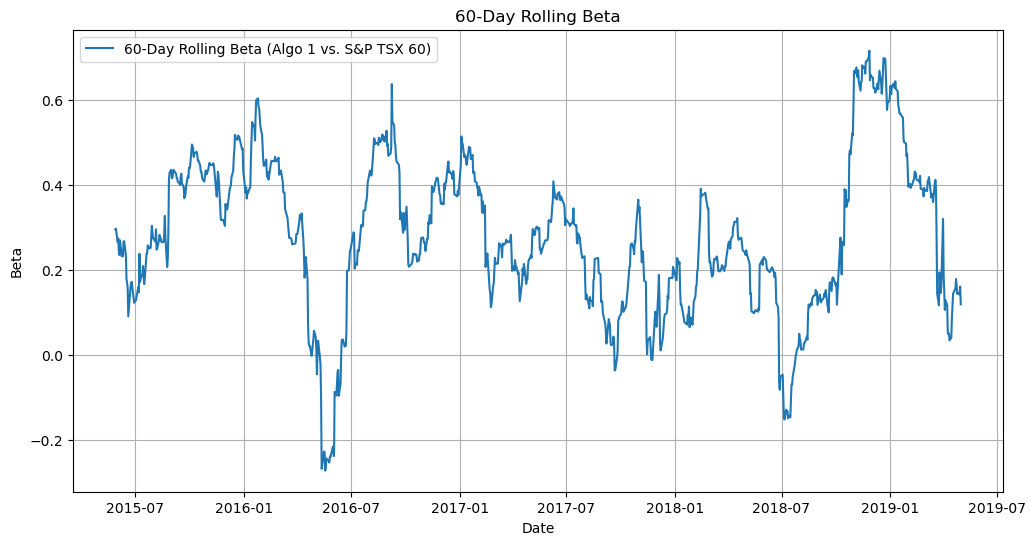

In [25]:
# Calculate covariance of a single portfolio
covariance_alg = merged_df['Algo 1'].rolling(window=60).cov(merged_df['TSX 60 Returns'])

# Calculate variance of S&P TSX
variance_sp500 = merged_df['TSX 60 Returns'].rolling(window=60).var()

# Computing beta
rolling_beta = covariance_alg/variance_sp500

# Plot beta trend
plt.figure(figsize=(12, 6))
plt.plot(rolling_beta.index, rolling_beta, label='60-Day Rolling Beta (Algo 1 vs. S&P TSX 60)')
plt.title('60-Day Rolling Beta')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


## Rolling Statistics Challenge: Exponentially Weighted Average

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [26]:
# Use `ewm` to calculate the rolling window
portfolio_columns = merged_df.columns

# Calculate and plot the rolling window standard deviation for each portfolio
merged_df.ewm(halflife=21).std().head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX 60 Returns
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517


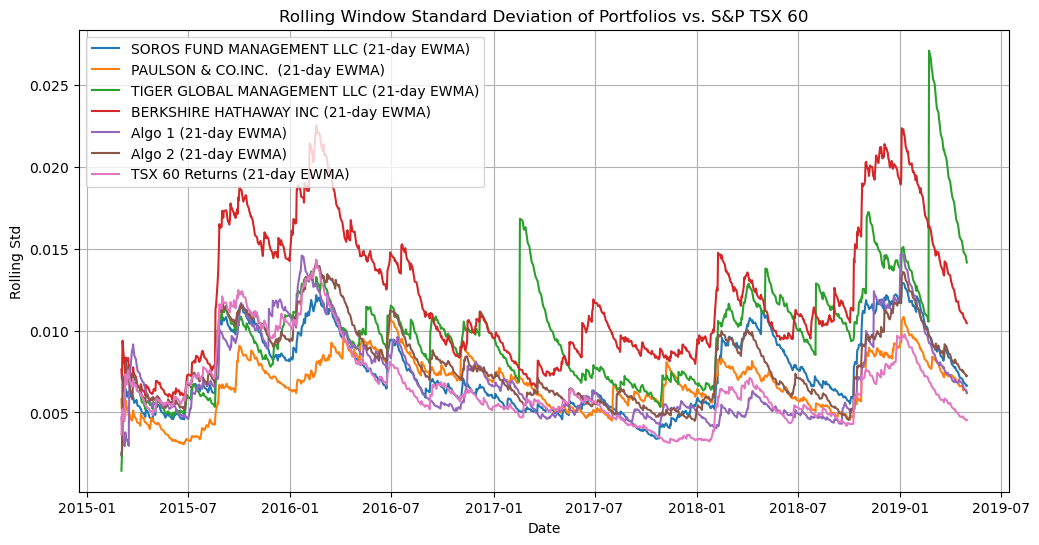

In [27]:
plt.figure(figsize=(12, 6))

for column in portfolio_columns:
    rolling_std = merged_df[column].ewm(halflife=21).std()
    plt.plot(rolling_std.index, rolling_std, label=f'{column} (21-day EWMA)')

plt.title("Rolling Window Standard Deviation of Portfolios vs. S&P TSX 60")
plt.xlabel("Date")
plt.ylabel("Rolling Std")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
sharpe_ratios = (merged_df.mean() * 252) / (merged_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
TSX 60 Returns                 0.195550
dtype: float64

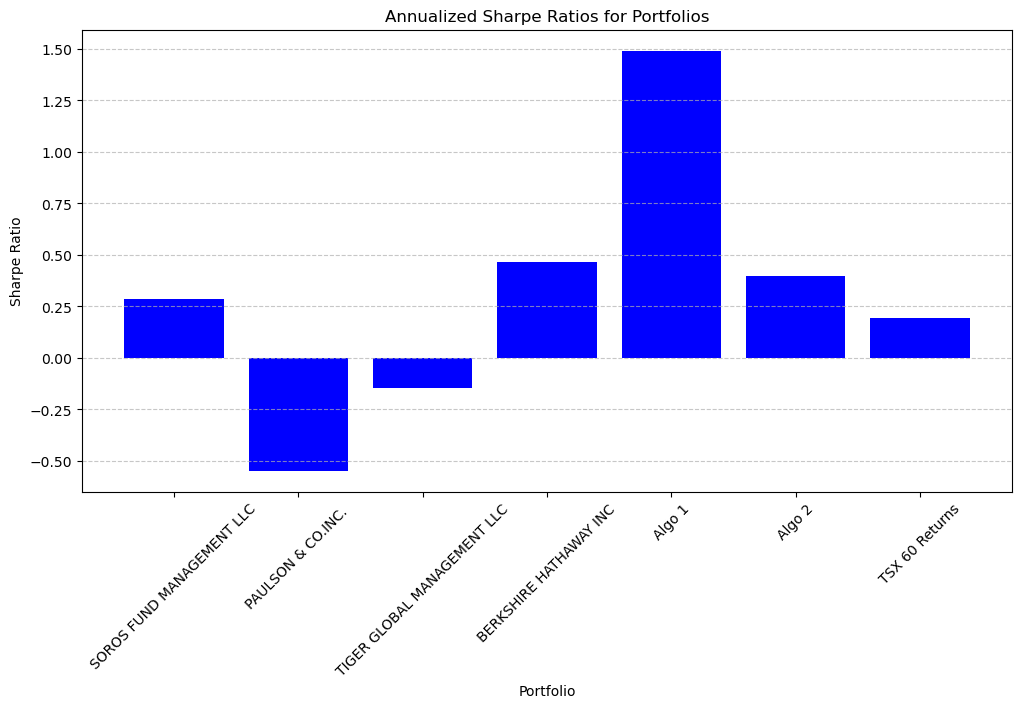

In [29]:
# Visualize the sharpe ratios as a bar plot
plt.figure(figsize=(12, 6))
plt.bar(sharpe_ratios.index, sharpe_ratios.values, color='blue')
plt.title("Annualized Sharpe Ratios for Portfolios")
plt.xlabel("Portfolio")
plt.ylabel("Sharpe Ratio")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

'Algo 1' has the highest Sharpe ratio, indicating that it has the best risk-adjusted performance among all the strategies and portfolios considered. Additionally, 'Algo 2' has a positive sharpe ratio showing a good risk-adjusted performance. Therefore,algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60.

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [31]:
# Reading data from 1st stock
tcs_df=pd.read_csv('/Users/tej/Documents/GitHub/Module_4_challenge/Resources/TCS.NS - TCS.NS.csv', parse_dates=['Date'],index_col='Date')
tcs_df.head()

,Close
Date,
2016-09-01,1253.750000
2016-09-02,1257.400024
2016-09-06,1242.025024
2016-09-07,1220.275024
2016-09-08,1161.050049


In [32]:
# Reading data from 2nd stock
rel_df=pd.read_csv('/Users/tej/Documents/GitHub/Module_4_challenge/Resources/RELIANCE.NS - RELIANCE.NS.csv', parse_dates=['Date'],index_col='Date')
rel_df.head()

,Close
Date,
2016-09-01,509.767914
2016-09-02,501.917328
2016-09-06,505.161560
2016-09-07,504.047150
2016-09-08,511.848175


In [33]:
# Reading data from 3rd stock
hdfc_df=pd.read_csv('/Users/tej/Documents/GitHub/Module_4_challenge/Resources/HDFCBANK.NS - HDFCBANK.NS.csv', parse_dates=['Date'],index_col='Date')
hdfc_df.head()

,Close
Date,
2016-09-01,641.849976
2016-09-02,642.549988
2016-09-06,650.200012
2016-09-07,643.375000
2016-09-08,644.700012


In [34]:
# Combine all stocks in a single DataFrame
my_portfolio = pd.concat([tcs_df, rel_df, hdfc_df], axis='columns', join='inner')


In [35]:
# Reset Date index
my_portfolio.head()

,Close,Close,Close
Date,,,
2016-09-01,1253.750000,509.767914,641.849976
2016-09-02,1257.400024,501.917328,642.549988
2016-09-06,1242.025024,505.161560,650.200012
2016-09-07,1220.275024,504.047150,643.375000
2016-09-08,1161.050049,511.848175,644.700012


In [36]:
# Reorganize portfolio data by having a column per symbol
my_portfolio.columns = ['TCS', 'REL', 'HDFC']

# Print the reorganized portfolio
my_portfolio.head()

,TCS,REL,HDFC
Date,,,
2016-09-01,1253.750000,509.767914,641.849976
2016-09-02,1257.400024,501.917328,642.549988
2016-09-06,1242.025024,505.161560,650.200012
2016-09-07,1220.275024,504.047150,643.375000
2016-09-08,1161.050049,511.848175,644.700012


In [37]:
# Calculate daily returns
my_portfolio_return = my_portfolio.sort_index().pct_change()
# Drop NAs
my_portfolio_return.dropna(inplace=True)
# Display sample data
my_portfolio_return.head()

,TCS,REL,HDFC
Date,,,
2016-09-02,0.002911,-0.015400,0.001091
2016-09-06,-0.012228,0.006464,0.011906
2016-09-07,-0.017512,-0.002206,-0.010497
2016-09-08,-0.048534,0.015477,0.002059
2016-09-09,0.013070,0.010790,0.000776


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_portfolio = my_portfolio_return.dot(weights)
weighted_portfolio.sum()
# Convert the result to a DataFrame with a column name
portfolio_return_df = pd.DataFrame({'MY PORTFOLIO': weighted_portfolio})
# Display sample data
portfolio_return_df.head()

,MY PORTFOLIO
Date,
2016-09-02,-0.003799
2016-09-06,0.002047
2016-09-07,-0.010072
2016-09-08,-0.010333
2016-09-09,0.008212


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# Join your returns DataFrame to the original returns DataFrame
combined_df = pd.concat([df1, df2, df4, portfolio_return_df], axis=1)

# Display the combined DataFrame
combined_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX 60 Returns,MY PORTFOLIO
Date,,,,,,,,
2012-10-02,NaN,NaN,NaN,NaN,NaN,NaN,0.001701,NaN
2012-10-03,NaN,NaN,NaN,NaN,NaN,NaN,-0.002563,NaN
2012-10-04,NaN,NaN,NaN,NaN,NaN,NaN,0.007137,NaN
2012-10-05,NaN,NaN,NaN,NaN,NaN,NaN,-0.002305,NaN
2012-10-09,NaN,NaN,NaN,NaN,NaN,NaN,-0.011709,NaN


In [40]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df = combined_df.dropna(how='any')

# Display the combined DataFrame
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX 60 Returns,MY PORTFOLIO
Date,,,,,,,,
2016-09-02,0.002950,-0.006813,0.003071,0.001946,0.000424,0.009809,0.007613,-0.003799
2016-09-06,0.004743,0.007226,0.001720,0.013466,0.004714,0.004576,0.001171,0.002047
2016-09-07,0.004764,0.000047,0.001169,0.003368,-0.001534,0.005013,-0.001098,-0.010072
2016-09-08,-0.005975,0.002030,-0.005891,-0.006236,0.008617,0.003821,0.000440,-0.010333
2016-09-09,-0.016075,-0.012261,-0.032441,-0.017431,-0.000277,-0.024699,-0.017784,0.008212


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [41]:
# Calculate the annualized `std`
annual_portfolio_std = combined_df.std() * np.sqrt(252)
annual_portfolio_std

SOROS FUND MANAGEMENT LLC      0.102719
PAULSON & CO.INC.              0.101338
TIGER GLOBAL MANAGEMENT LLC    0.156292
BERKSHIRE HATHAWAY INC         0.156617
Algo 1                         0.084776
Algo 2                         0.103755
TSX 60 Returns                 0.081184
MY PORTFOLIO                   0.123737
dtype: float64

### Calculate and plot rolling `std` with 21-day window

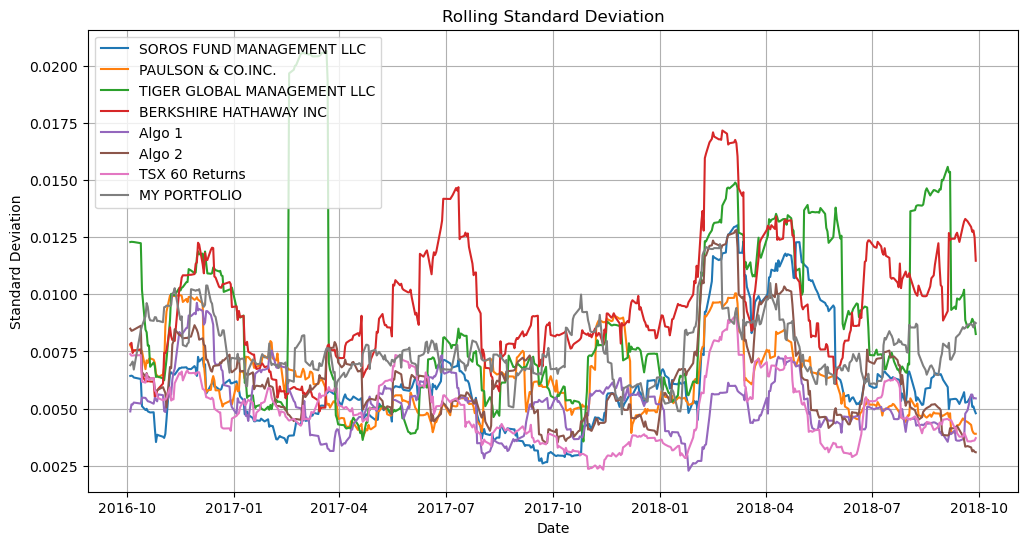

In [42]:
# Calculate rolling standard deviation
roll_std=combined_df.rolling(window=21).std()
# Plot rolling standard deviation
plt.figure(figsize=(12, 6))
for column in roll_std.columns:
    plt.plot(roll_std.index, roll_std[column], label=column)

plt.title('Rolling Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

### Calculate and plot the correlation

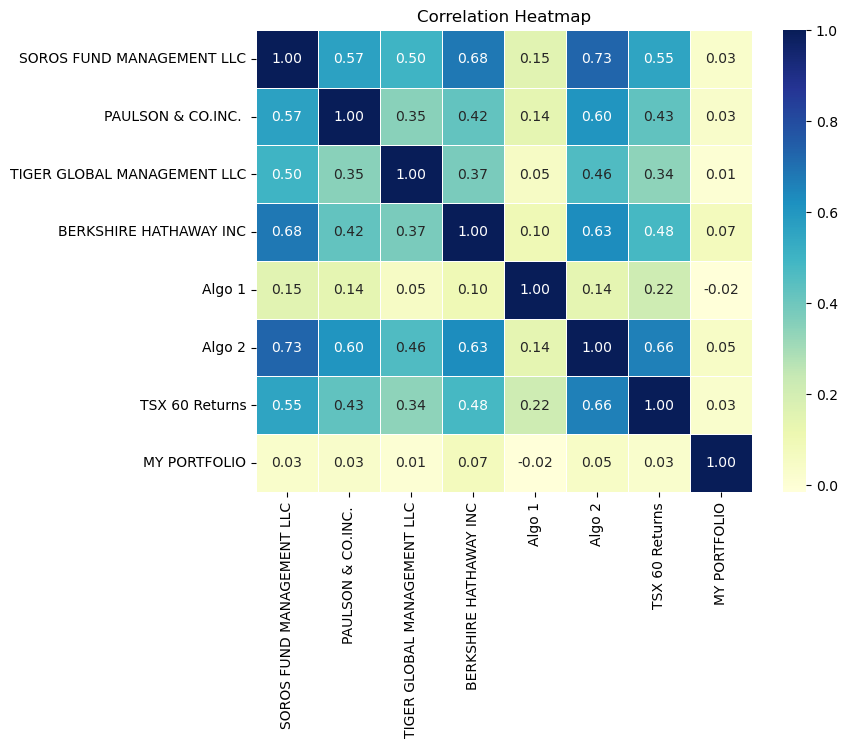

In [43]:
# Calculate and plot the correlation
correlation_matrix = combined_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

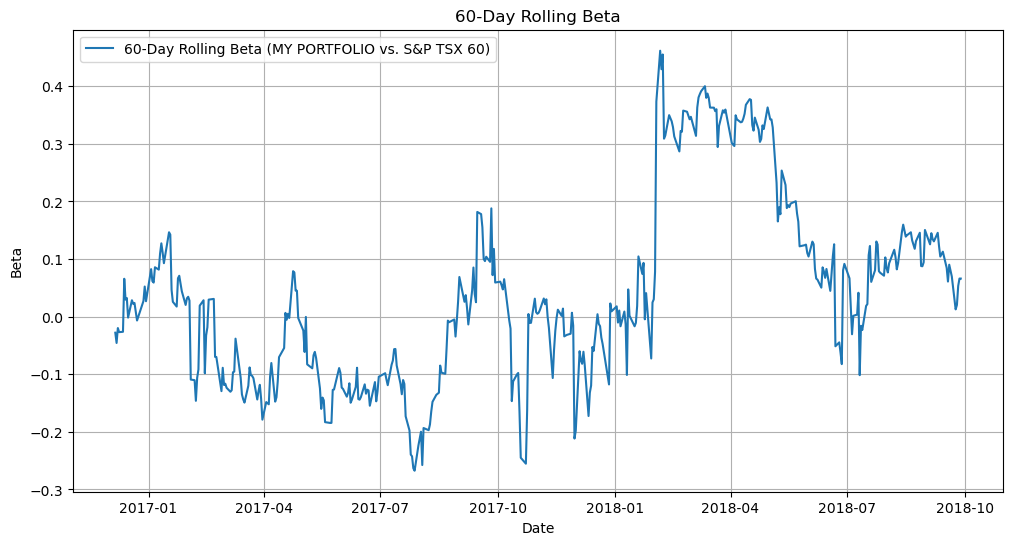

In [44]:
# Calculate and plot Beta
covariance = combined_df['MY PORTFOLIO'].rolling(window=60).cov(combined_df['TSX 60 Returns'])
variance = combined_df['TSX 60 Returns'].rolling(window=60).var()
beta = covariance/variance
# Plot beta trend
plt.figure(figsize=(12, 6))
plt.plot(beta.index, beta, label='60-Day Rolling Beta (MY PORTFOLIO vs. S&P TSX 60)')
plt.title('60-Day Rolling Beta')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [45]:
# Calculate Annualized Sharpe Ratios
annual_portfolio_sharpe_ratio = (combined_df.mean() * 252)/(combined_df.std() * np.sqrt(252))
annual_portfolio_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.517204
PAULSON & CO.INC.             -0.754592
TIGER GLOBAL MANAGEMENT LLC   -0.256761
BERKSHIRE HATHAWAY INC         1.306597
Algo 1                         1.169765
Algo 2                         1.137912
TSX 60 Returns                 0.694171
MY PORTFOLIO                   2.705630
dtype: float64

<Axes: >

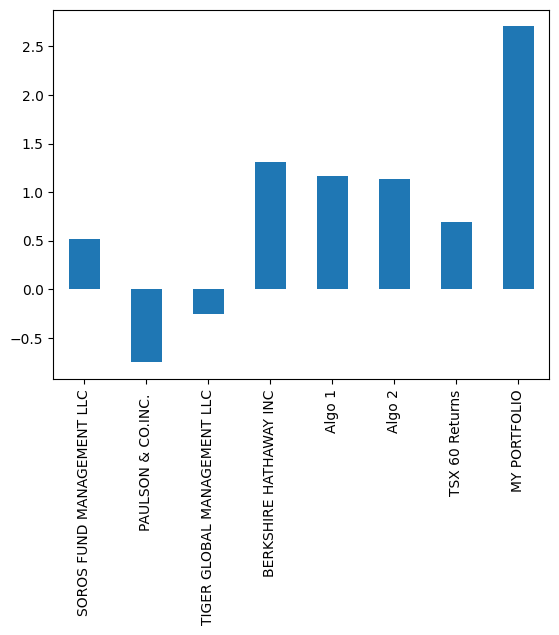

In [199]:
# Visualize the sharpe ratios as a bar plot
annual_portfolio_sharpe_ratio.plot.bar()

### How does your portfolio do?

'MY PORTFOLIO' has quite high sharpe ratio, indicating that it has provided strong risk-adjusted returns, outperforming the market and other portfolios as well